# Name : Jay Rambhiya

# Git-Hub Username : jay-rambhiya

# USC ID: #2219880371

In [1]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import boxplot as bp
from sklearn.impute import SimpleImputer
from tabulate import tabulate
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import warnings
from sklearn.model_selection import GridSearchCV,KFold
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
import warnings
warnings.filterwarnings("ignore")

# 1. (b) Data Preparation

In [2]:
trainingData = pd.read_csv('../Data/aps+failure+at+scania+trucks/aps_failure_training_set.csv', skiprows = 20)

In [3]:
testingData = pd.read_csv('../Data/aps+failure+at+scania+trucks/aps_failure_test_set.csv', skiprows = 20)

In [4]:
trainingData

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698     na  2130706438    280      0      0      0      0   
1       neg   33058     na           0     na      0      0      0      0   
2       neg   41040     na         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874     na        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
59995   neg  153002     na         664    186      0      0      0      0   
59996   neg    2286     na  2130706538    224      0      0      0      0   
59997   neg     112      0  2130706432     18      0      0      0      0   
59998   neg   80292     na  2130706432    494      0      0      0      0   
59999   neg   40222     na         698    628      0      0      0      0   

      ag_002  ...   ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384   721044   469792   339156  157956   73224   
1          0  ...   421400  178064   293306   245416   133654   81140   97576   
2          0  ...   277378  159812   423992   409564   320746  158022   95128   
3          0  ...      240      46       58       44       10       0       0   
4          0  ...   622012  229790   405298   347188   286954  311560  433954   
...      ...  ...      ...     ...      ...      ...      ...     ...     ...   
59995      0  ...   998500  566884  1290398  1218244  1019768  717762  898642   
59996      0  ...    10578    6760    21126    68424      136       0       0   
59997      0  ...      792     386      452      144      146    2622       0   
59998      0  ...   699352  222654   347378   225724   194440  165070  802280   
59999      0  ...   440066  183200   344546   254068   225148  158304  170384   

       ee_009 ef_000 eg_000  
0           0      0      0  
1        1500      0      0  
2         514      0      0  
3           0      4     32  
4        1218      0      0  
...       ...    ...    ...  
59995   28588      0      0  
59996       0      0      0  
59997       0      0      0  
59998  388422      0      0  
59999     158      0      0  

[60000 rows x 171 columns]

In [5]:
testingData

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg      60      0          20     12      0      0      0      0   
1       neg      82      0          68     40      0      0      0      0   
2       neg   66002      2         212    112      0      0      0      0   
3       neg   59816     na        1010    936      0      0      0      0   
4       neg    1814     na         156    140      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
15995   neg   81852     na  2130706432    892      0      0      0      0   
15996   neg      18      0          52     46      8     26      0      0   
15997   neg   79636     na        1670   1518      0      0      0      0   
15998   neg     110     na          36     32      0      0      0      0   
15999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...  ee_002  ee_003  ee_004  ee_005   ee_006  ee_007  ee_008  \
0          0  ...    1098     138     412     654       78      88       0   
1          0  ...    1068     276    1620     116       86     462       0   
2          0  ...  495076  380368  440134  269556  1315022  153680     516   
3          0  ...  540820  243270  483302  485332   431376  210074  281662   
4          0  ...    7646    4144   18466   49782     3176     482      76   
...      ...  ...     ...     ...     ...     ...      ...     ...     ...   
15995      0  ...  632658  273242  510354  373918   349840  317840  960024   
15996      0  ...     266      44      46      14        2       0       0   
15997      0  ...  806832  449962  778826  581558   375498  222866  358934   
15998      0  ...     588     210     180     544     1004    1338      74   
15999      0  ...      46      10      48      14       42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1          0      0      0  
2          0      0      0  
3       3232      0      0  
4          0      0      0  
...      ...    ...    ...  
15995  25566      0      0  
15996      0      0      0  
15997  19548      0      0  
15998      0      0      0  
15999      0      0      0  

[16000 rows x 171 columns]

In [6]:
pd.set_option('display.max_rows', 5000)

In [7]:
trainingData = trainingData.replace('na', np.NaN)

In [8]:
testingData = testingData.replace('na', np.NaN)

In [9]:
trainingData.isna().sum()

class         0
aa_000        0
ab_000    46329
ac_000     3335
ad_000    14861
ae_000     2500
af_000     2500
ag_000      671
ag_001      671
ag_002      671
ag_003      671
ag_004      671
ag_005      671
ag_006      671
ag_007      671
ag_008      671
ag_009      671
ah_000      645
ai_000      629
aj_000      629
ak_000     4400
al_000      642
am_0        629
an_000      642
ao_000      589
ap_000      642
aq_000      589
ar_000     2723
as_000      629
at_000      629
au_000      629
av_000     2500
ax_000     2501
ay_000      671
ay_001      671
ay_002      671
ay_003      671
ay_004      671
ay_005      671
ay_006      671
ay_007      671
ay_008      671
ay_009      671
az_000      671
az_001      671
az_002      671
az_003      671
az_004      671
az_005      671
az_006      671
az_007      671
az_008      671
az_009      671
ba_000      688
ba_001      688
ba_002      688
ba_003      688
ba_004      688
ba_005      688
ba_006      688
ba_007      688
ba_008      688
ba_009  

In [10]:
testingData.isna().sum()

class         0
aa_000        0
ab_000    12363
ac_000      926
ad_000     3981
ae_000      690
af_000      690
ag_000      189
ag_001      189
ag_002      189
ag_003      189
ag_004      189
ag_005      189
ag_006      189
ag_007      189
ag_008      189
ag_009      189
ah_000      175
ai_000      163
aj_000      163
ak_000     1198
al_000      169
am_0        163
an_000      169
ao_000      162
ap_000      169
aq_000      162
ar_000      764
as_000      163
at_000      163
au_000      163
av_000      688
ax_000      688
ay_000      192
ay_001      192
ay_002      192
ay_003      192
ay_004      192
ay_005      192
ay_006      192
ay_007      192
ay_008      192
ay_009      192
az_000      192
az_001      192
az_002      192
az_003      192
az_004      192
az_005      192
az_006      192
az_007      192
az_008      192
az_009      192
ba_000      193
ba_001      193
ba_002      193
ba_003      193
ba_004      193
ba_005      193
ba_006      193
ba_007      193
ba_008      193
ba_009  

# (b) i. Techniques to deal with missing values
i. We can use statistics such as mean, median and mode to replace the missing values.

ii. We can replace the missing values with the corresponding value in a randomly selected observation from the dataset.

iii. We can use iterative methods that are based on Expectation Maximization to handle the missing values.

# For this assignment, we will use the mean value of the columns to fill in the missing values in the corresponding column.

In [11]:
data = pd.concat([trainingData, testingData], ignore_index = True)

In [12]:
data

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001  \
0       neg   76698    NaN  2130706438    280      0      0      0      0   
1       neg   33058    NaN           0    NaN      0      0      0      0   
2       neg   41040    NaN         228    100      0      0      0      0   
3       neg      12      0          70     66      0     10      0      0   
4       neg   60874    NaN        1368    458      0      0      0      0   
...     ...     ...    ...         ...    ...    ...    ...    ...    ...   
75995   neg   81852    NaN  2130706432    892      0      0      0      0   
75996   neg      18      0          52     46      8     26      0      0   
75997   neg   79636    NaN        1670   1518      0      0      0      0   
75998   neg     110    NaN          36     32      0      0      0      0   
75999   neg       8      0           6      4      2      2      0      0   

      ag_002  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3          0  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 171 columns]

In [13]:
xData = data.drop(columns = ['class'])
xData

aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0       76698    NaN  2130706438    280      0      0      0      0      0   
1       33058    NaN           0    NaN      0      0      0      0      0   
2       41040    NaN         228    100      0      0      0      0      0   
3          12      0          70     66      0     10      0      0      0   
4       60874    NaN        1368    458      0      0      0      0      0   
...       ...    ...         ...    ...    ...    ...    ...    ...    ...   
75995   81852    NaN  2130706432    892      0      0      0      0      0   
75996      18      0          52     46      8     26      0      0      0   
75997   79636    NaN        1670   1518      0      0      0      0      0   
75998     110    NaN          36     32      0      0      0      0      0   
75999       8      0           6      4      2      2      0      0      0   

      ag_003  ...   ee_002  ee_003  ee_004  ee_005  ee_006  ee_007  ee_008  \
0          0  ...  1240520  493384  721044  469792  339156  157956   73224   
1          0  ...   421400  178064  293306  245416  133654   81140   97576   
2          0  ...   277378  159812  423992  409564  320746  158022   95128   
3        318  ...      240      46      58      44      10       0       0   
4          0  ...   622012  229790  405298  347188  286954  311560  433954   
...      ...  ...      ...     ...     ...     ...     ...     ...     ...   
75995      0  ...   632658  273242  510354  373918  349840  317840  960024   
75996      0  ...      266      44      46      14       2       0       0   
75997      0  ...   806832  449962  778826  581558  375498  222866  358934   
75998      0  ...      588     210     180     544    1004    1338      74   
75999      0  ...       46      10      48      14      42      46       0   

      ee_009 ef_000 eg_000  
0          0      0      0  
1       1500      0      0  
2        514      0      0  
3          0      4     32  
4       1218      0      0  
...      ...    ...    ...  
75995  25566      0      0  
75996      0      0      0  
75997  19548      0      0  
75998      0      0      0  
75999      0      0      0  

[76000 rows x 170 columns]

In [14]:
simpleImputer = SimpleImputer(strategy = 'mean', missing_values = np.NaN)
simpleImputer = simpleImputer.fit(xData)
xData.iloc[:, :] = simpleImputer.transform(xData)
xData

aa_000   ab_000        ac_000         ad_000 ae_000 af_000 ag_000  \
0       76698  0.72556  2130706438.0          280.0    0.0    0.0    0.0   
1       33058  0.72556           0.0  150629.962105    0.0    0.0    0.0   
2       41040  0.72556         228.0          100.0    0.0    0.0    0.0   
3          12      0.0          70.0           66.0    0.0   10.0    0.0   
4       60874  0.72556        1368.0          458.0    0.0    0.0    0.0   
...       ...      ...           ...            ...    ...    ...    ...   
75995   81852  0.72556  2130706432.0          892.0    0.0    0.0    0.0   
75996      18      0.0          52.0           46.0    8.0   26.0    0.0   
75997   79636  0.72556        1670.0         1518.0    0.0    0.0    0.0   
75998     110  0.72556          36.0           32.0    0.0    0.0    0.0   
75999       8      0.0           6.0            4.0    2.0    2.0    0.0   

      ag_001 ag_002 ag_003  ...     ee_002    ee_003    ee_004    ee_005  \
0        0.0    0.0    0.0  ...  1240520.0  493384.0  721044.0  469792.0   
1        0.0    0.0    0.0  ...   421400.0  178064.0  293306.0  245416.0   
2        0.0    0.0    0.0  ...   277378.0  159812.0  423992.0  409564.0   
3        0.0    0.0  318.0  ...      240.0      46.0      58.0      44.0   
4        0.0    0.0    0.0  ...   622012.0  229790.0  405298.0  347188.0   
...      ...    ...    ...  ...        ...       ...       ...       ...   
75995    0.0    0.0    0.0  ...   632658.0  273242.0  510354.0  373918.0   
75996    0.0    0.0    0.0  ...      266.0      44.0      46.0      14.0   
75997    0.0    0.0    0.0  ...   806832.0  449962.0  778826.0  581558.0   
75998    0.0    0.0    0.0  ...      588.0     210.0     180.0     544.0   
75999    0.0    0.0    0.0  ...       46.0      10.0      48.0      14.0   

         ee_006    ee_007    ee_008   ee_009 ef_000 eg_000  
0      339156.0  157956.0   73224.0      0.0    0.0    0.0  
1      133654.0   81140.0   97576.0   1500.0    0.0    0.0  
2      320746.0  158022.0   95128.0    514.0    0.0    0.0  
3          10.0       0.0       0.0      0.0    4.0   32.0  
4      286954.0  311560.0  433954.0   1218.0    0.0    0.0  
...         ...       ...       ...      ...    ...    ...  
75995  349840.0  317840.0  960024.0  25566.0    0.0    0.0  
75996       2.0       0.0       0.0      0.0    0.0    0.0  
75997  375498.0  222866.0  358934.0  19548.0    0.0    0.0  
75998    1004.0    1338.0      74.0      0.0    0.0    0.0  
75999      42.0      46.0       0.0      0.0    0.0    0.0  

[76000 rows x 170 columns]

In [15]:
yData = data['class']
yData

0        neg
1        neg
2        neg
3        neg
4        neg
        ... 
75995    neg
75996    neg
75997    neg
75998    neg
75999    neg
Name: class, Length: 76000, dtype: object

In [16]:
yData = yData.map({'pos': 1, 'neg': 0})
yData

0        0
1        0
2        0
3        0
4        0
        ..
75995    0
75996    0
75997    0
75998    0
75999    0
Name: class, Length: 76000, dtype: int64

In [17]:
xTrain = xData.iloc[:60000, :]
xTest = xData.iloc[60000:, :]
yTrain = yData.iloc[:60000]
yTest = yData.iloc[60000:]

In [18]:
print(xTrain, xTest, yTrain, yTest)

       aa_000   ab_000        ac_000         ad_000 ae_000 af_000 ag_000  \
0       76698  0.72556  2130706438.0          280.0    0.0    0.0    0.0   
1       33058  0.72556           0.0  150629.962105    0.0    0.0    0.0   
2       41040  0.72556         228.0          100.0    0.0    0.0    0.0   
3          12      0.0          70.0           66.0    0.0   10.0    0.0   
4       60874  0.72556        1368.0          458.0    0.0    0.0    0.0   
...       ...      ...           ...            ...    ...    ...    ...   
59995  153002  0.72556         664.0          186.0    0.0    0.0    0.0   
59996    2286  0.72556  2130706538.0          224.0    0.0    0.0    0.0   
59997     112      0.0  2130706432.0           18.0    0.0    0.0    0.0   
59998   80292  0.72556  2130706432.0          494.0    0.0    0.0    0.0   
59999   40222  0.72556         698.0          628.0    0.0    0.0    0.0   

      ag_001 ag_002  ag_003  ...     ee_002    ee_003     ee_004     ee_005  \
0       

# ii. Coefficient of variation for the features

In [19]:
features = xData.columns
features

Index(['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000',
       'ag_001', 'ag_002', 'ag_003',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=170)

In [20]:
coefficients = []
for f in features:
    d = xData[f]
    std = d.std()
    mean = d.mean()
    coeff = round(std / mean, 3)
    coefficients.append([f, coeff])

print(tabulate(coefficients, headers = ['Features', 'Coefficient of Variation(CV)']))

Features      Coefficient of Variation(CV)
----------  ------------------------------
aa_000                               4.329
ab_000                               2.178
ac_000                               2.168
ad_000                             206.721
ae_000                              22.294
af_000                              18.209
ag_000                              91.461
ag_001                              42.084
ag_002                              17.626
ag_003                               8.753
ag_004                               5.475
ag_005                               2.964
ag_006                               2.353
ag_007                               2.812
ag_008                               6.275
ag_009                              32.167
ah_000                               2.316
ai_000                              18.506
aj_000                              43.144
ak_000                              78.623
al_000                               9.112
am_0       

# iii. Correlation Matrix

In [21]:
corMat = xData.corr()
corMat.style.background_gradient(cmap = 'coolwarm')

# iv. Scatterplots and Boxplots

In [22]:
coefficients.sort(key = lambda c: c[1], reverse = True)
coefficients

[['cf_000', 207.27],
 ['co_000', 206.876],
 ['ad_000', 206.721],
 ['cs_009', 192.523],
 ['dj_000', 122.128],
 ['as_000', 113.883],
 ['dh_000', 112.652],
 ['df_000', 111.37],
 ['ag_000', 91.461],
 ['au_000', 86.086],
 ['ak_000', 78.623],
 ['az_009', 78.0],
 ['ay_009', 77.461],
 ['ch_000', 57.498],
 ['cs_008', 57.202],
 ['ay_001', 49.249],
 ['dz_000', 49.249],
 ['ef_000', 47.92],
 ['eg_000', 45.651],
 ['aj_000', 43.144],
 ['ag_001', 42.084],
 ['ay_000', 40.903],
 ['ay_002', 38.342],
 ['dl_000', 37.457],
 ['dk_000', 36.518],
 ['dg_000', 34.677],
 ['dm_000', 34.552],
 ['ay_004', 33.04],
 ['ea_000', 32.777],
 ['ag_009', 32.167],
 ['cn_009', 30.961],
 ['ay_003', 28.33],
 ['cy_000', 28.006],
 ['cn_000', 27.975],
 ['da_000', 25.206],
 ['at_000', 23.187],
 ['az_008', 22.415],
 ['ae_000', 22.294],
 ['dq_000', 21.185],
 ['ai_000', 18.506],
 ['af_000', 18.209],
 ['ag_002', 17.626],
 ['az_007', 15.382],
 ['cp_000', 12.919],
 ['cn_001', 12.625],
 ['cr_000', 12.471],
 ['cl_000', 12.164],
 ['az_002', 

In [23]:
requiredFeatures = []
for i in range(int(math.sqrt(170))):
    requiredFeatures.append(coefficients[i][0])
requiredFeatures

['cf_000',
 'co_000',
 'ad_000',
 'cs_009',
 'dj_000',
 'as_000',
 'dh_000',
 'df_000',
 'ag_000',
 'au_000',
 'ak_000',
 'az_009',
 'ay_009']

In [24]:
requiredXData = xData[requiredFeatures]
requiredData = pd.concat([requiredXData, yData], axis = 1)
requiredData

cf_000         co_000         ad_000 cs_009 dj_000 as_000  \
0                2.0          220.0          280.0    0.0    0.0    0.0   
1      150231.156793  150517.375485  150629.962105    0.0    0.0    0.0   
2                0.0            0.0          100.0    0.0    0.0    0.0   
3                2.0            2.0           66.0    0.0    0.0    0.0   
4                0.0          202.0          458.0    0.0    0.0    0.0   
...              ...            ...            ...    ...    ...    ...   
75995            2.0           42.0          892.0    0.0    0.0    0.0   
75996            2.0            0.0           46.0    0.0    0.0    0.0   
75997            2.0          378.0         1518.0    0.0    0.0    0.0   
75998            0.0            0.0           32.0    0.0    0.0    0.0   
75999            0.0            0.0            4.0    0.0    0.0    0.0   

      dh_000 df_000 ag_000 au_000 ak_000 az_009 ay_009  class  
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
75995    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75996    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75997    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75998    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75999    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  

[76000 rows x 14 columns]

In [25]:
sns.pairplot(requiredData, hue = 'class')

# From the pairplot, we can see that the two classes are seperable for some pairs of features.

In [26]:
requiredData

cf_000         co_000         ad_000 cs_009 dj_000 as_000  \
0                2.0          220.0          280.0    0.0    0.0    0.0   
1      150231.156793  150517.375485  150629.962105    0.0    0.0    0.0   
2                0.0            0.0          100.0    0.0    0.0    0.0   
3                2.0            2.0           66.0    0.0    0.0    0.0   
4                0.0          202.0          458.0    0.0    0.0    0.0   
...              ...            ...            ...    ...    ...    ...   
75995            2.0           42.0          892.0    0.0    0.0    0.0   
75996            2.0            0.0           46.0    0.0    0.0    0.0   
75997            2.0          378.0         1518.0    0.0    0.0    0.0   
75998            0.0            0.0           32.0    0.0    0.0    0.0   
75999            0.0            0.0            4.0    0.0    0.0    0.0   

      dh_000 df_000 ag_000 au_000 ak_000 az_009 ay_009  class  
0        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
1        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
2        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
3        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
4        0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
...      ...    ...    ...    ...    ...    ...    ...    ...  
75995    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75996    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75997    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75998    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  
75999    0.0    0.0    0.0    0.0    0.0    0.0    0.0      0  

[76000 rows x 14 columns]

In [66]:
fig, axs = plt.subplots(figsize=(20, 30))
axs.set_ylim(-1000,100000)
axs.set_xticklabels(list(requiredData.columns))
axs.boxplot(requiredData)

{'whiskers': [<matplotlib.lines.Line2D at 0x15b2913d0>,
 'caps': [<matplotlib.lines.Line2D at 0x15b292590>,
 'boxes': [<matplotlib.lines.Line2D at 0x15b290c10>,
 'medians': [<matplotlib.lines.Line2D at 0x15b293790>,
 'fliers': [<matplotlib.lines.Line2D at 0x15adca490>,
 'means': []}

# v. Number of negatives and positives and presence of class imbalance?

In [69]:
data['class'].value_counts()

class
neg    74625
pos     1375
Name: count, dtype: int64

 From the numbers seen above, we can clearly say that the number of negative class samples is greater than the positive class samples. Hence, we can say that the data is highly imbalanced.

# (c) Random Forest

In [71]:
randomForestModel = RandomForestClassifier(oob_score = True)
randomForestModel = randomForestModel.fit(xTrain, yTrain)
yPredicted = randomForestModel.predict(xTest)
accuracy = accuracy_score(yTest, yPredicted)
print('The accuracy for the random forest model on test is', accuracy)

The accuracy for the random forest model on test is 0.992375


In [72]:
error = round(1 - accuracy, 3)
print('The test error is', error)

The test error is 0.008


In [73]:
oobError = round(1 - randomForestModel.oob_score_, 3)
print('The Out Of Bag error is', oobError)

The Out Of Bag error is 0.006


In [74]:
confMatrixTest = confusion_matrix(yTest, yPredicted)
trueNegative, falsePositive, falseNegative, testPositive = confMatrixTest.ravel()
print('The confusion matrix is\n', confMatrixTest)

The confusion matrix is
 [[15608    17]
 [  105   270]]


In [75]:
print('Misclassified test data samples are', falsePositive + falseNegative)

Misclassified test data samples are 122


In [76]:
yPredictedTraining = randomForestModel.predict(xTrain)
trainAccuracy = accuracy_score(yTrain, yPredictedTraining)
print('The accuracy for the random forest model on train is', trainAccuracy)

The accuracy for the random forest model on train is 0.9999833333333333


In [77]:
confMatrixTrain = confusion_matrix(yTrain, yPredictedTraining)
trueNegativeTrain, falsePositiveTrain, falseNegativeTrain, testPositiveTrain = confMatrixTrain.ravel()
print('The confusion matrix is\n', confMatrixTrain)

The confusion matrix is
 [[59000     0]
 [    1   999]]


In [78]:
print('Misclassified train data samples are', falsePositiveTrain + falseNegativeTrain)

Misclassified train data samples are 1


AUC value for test data is 0.859


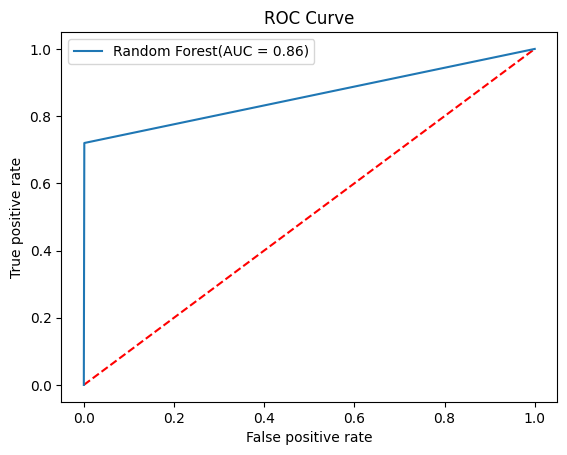

In [79]:
testFPR, testTPR, testThreshold = roc_curve(yTest, yPredicted)
testAuc = round(roc_auc_score(yTest, yPredicted), 3)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(testFPR, testTPR, label = 'Random Forest(AUC = %0.2f)'%testAuc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is', testAuc)

AUC value for train data is 1.0


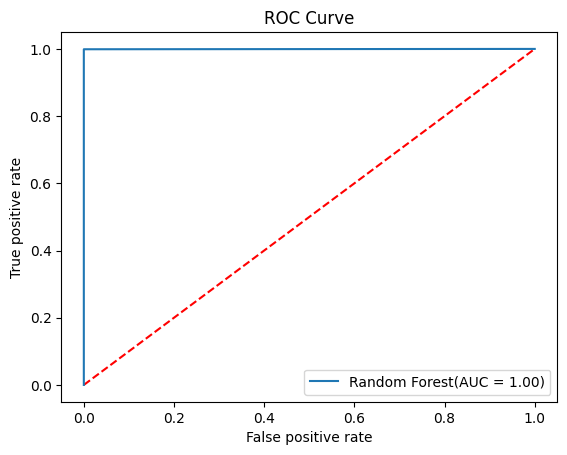

In [80]:
trainFPR, trainTPR, trainThreshold = roc_curve(yTrain, yPredictedTraining)
trainAuc = round(roc_auc_score(yTrain, yPredictedTraining), 3)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(trainFPR, trainTPR, label = 'Random Forest(AUC = %0.2f)'%trainAuc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for train data is', trainAuc)

# (d) Research class imbalance in random forests

# The two ways of handling class imbalance in case of random forests are as follows:

Using a balanced random forest classifier.

Using class_weights as balanced.

In [82]:
randomForestClassifierBalanced = RandomForestClassifier(oob_score = True, class_weight = 'balanced')
randomForestClassifierBalanced = randomForestClassifierBalanced.fit(xTrain, yTrain)


yPredicted = randomForestClassifierBalanced.predict(xTest)
accuracyTest = accuracy_score(yTest, yPredicted)

errorTestBalanced = round(1 - accuracyTest, 3)
print("The test error for balanced random forest is", errorTestBalanced)

oobErrorBalanced = round(1 - randomForestClassifierBalanced.oob_score_, 3)
print("The Out Of Bag error for balanced random forest is", oobErrorBalanced)

confMatrixTest = confusion_matrix(yTest, yPredicted)
trueNegativeTest, falsePositiveTest, falseNegativeTest, truePositiveTest = confMatrixTest.ravel()
print("Confusion matrix for test is", confMatrixTest)
print("The test missclassification is", falsePositiveTest + falseNegativeTest)

yPredictedTrain = randomForestClassifierBalanced.predict(xTrain)
accuracyTrain = accuracy_score(yTrain, yPredictedTrain)
errorTrainBalanced = round(1 - accuracyTrain, 3)
print("The train error for balanced random forest is", errorTrainBalanced)

confMatrixTrain = confusion_matrix(yTrain, yPredictedTrain)
trueNegativeTrain, falsePositiveTrain, falseNegativeTrain, truePositiveTrain = confMatrixTrain.ravel()
print("Confusion matrix for train is", confMatrixTrain)
print("The test missclassification is", falsePositiveTrain + falseNegativeTrain)


The test error for balanced random forest is 0.011
The Out Of Bag error for balanced random forest is 0.008
Confusion matrix for test is [[15612    13]
 [  156   219]]
The test missclassification is 169
The train error for balanced random forest is 0.0
Confusion matrix for train is [[59000     0]
 [    1   999]]
The test missclassification is 1


In [83]:
testFPR, testTPR, testThreshold = roc_curve(yTest, yPredicted)
testAuc = round(roc_auc_score(yTest, yPredicted), 3)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(testFPR, testTPR, label = 'Random Forest(AUC = %0.2f)'%testAuc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for test data is', testAuc)

AUC value for test data is 0.792


In [84]:
trainFPR, trainTPR, trainThreshold = roc_curve(yTrain, yPredictedTrain)
trainAuc = round(roc_auc_score(yTrain, yPredictedTrain), 3)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(trainFPR, trainTPR, label = 'Random Forest(AUC = %0.2f)'%testAuc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for train data is', trainAuc)

AUC value for train data is 1.0


In [85]:
l = [[error, errorTestBalanced, oobError, oobErrorBalanced]]
print(tabulate(l, headers = ['Test Error(RF)', 'Test Error(Balanced RF)', 'OOB Error(RF)', 'OOB Error(Balanced RF)']))

  Test Error(RF)    Test Error(Balanced RF)    OOB Error(RF)    OOB Error(Balanced RF)
----------------  -------------------------  ---------------  ------------------------
           0.008                      0.011            0.006                     0.008


# (e) XG Boost

In [94]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]
xTrain = xTrain.astype(float)
yTrain = yTrain.astype(float)
xgBoostModel = xgb.XGBClassifier(objective = 'binary:logistic', use_label_encoder = False, eval_metric = 'logloss')
xgbParameters = {'reg_alpha': alphas}

xgbModelVal = GridSearchCV(xgBoostModel, xgbParameters, cv = 5)
xgbModelVal = xgbModelVal.fit(xTrain, yTrain)

bestAlpha = xgbModelVal.best_params_['reg_alpha']
bestAlpha = round(bestAlpha, 6)

print('Best alpha is', bestAlpha)


Best alpha is 0.0001


In [95]:
# Fitting a XGBoost on the best alpha
xgbModel = xgb.XGBClassifier(objective = "binary:logistic", use_label_encoder = False, eval_metric = 'logloss', reg_alpha = bestAlpha)
xgbModel = xgbModel.fit(xTrain, yTrain)
xTest = xTest.astype(float)
yPredicted = xgbModel.predict(xTest)
xgbMSE = round(mean_squared_error(yTest, yPredicted), 3)
print('The test MSE for XGBoost Regression is', xgbMSE)

The test MSE for XGBoost Regression is 0.006


In [96]:
error = 1 - accuracy_score(yTest, yPredicted)
print('The test error is', error)

The test error is 0.0061875000000000124


In [97]:
confMatrixTest = confusion_matrix(yTest, yPredicted)
trueNegativeTest, falsePositiveTest, falseNegativeTest, truePositiveTest = confMatrixTest.ravel()
print("Confusion matrix for test is", confMatrixTest)

Confusion matrix for test is [[15606    19]
 [   80   295]]


In [98]:
yPredictedTrain = xgbModel.predict(xTrain)
error = 1 - accuracy_score(yTrain, yPredictedTrain)
print('The train error is', error)

The train error is 1.666666666666483e-05


In [99]:
confMatrixTrain = confusion_matrix(yTrain, yPredictedTrain)
trueNegativeTrain, falsePositiveTrain, falseNegativeTrain, truePositiveTrain = confMatrixTrain.ravel()
print("Confusion matrix for train is", confMatrixTrain)

Confusion matrix for train is [[59000     0]
 [    1   999]]


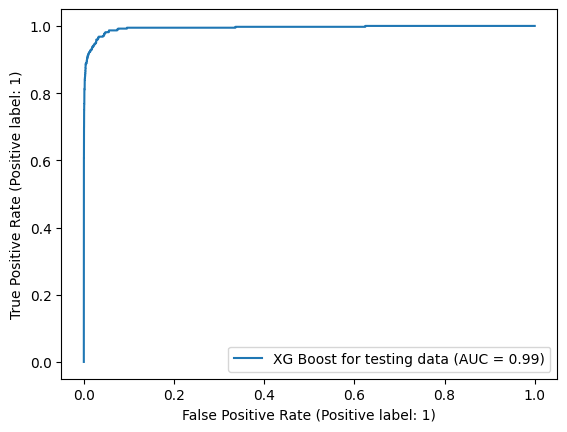

In [100]:
RocCurveDisplay.from_estimator(xgbModel, xTest, yTest, name = 'XG Boost for testing data')

In [101]:
trainFPR, trainTPR, trainThreshold = roc_curve(yTrain, yPredictedTrain)
trainAuc = round(roc_auc_score(yTrain, yPredictedTrain), 3)
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(trainFPR, trainTPR, label = 'XGBoost (AUC = %0.2f)'%trainAuc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')
plt.legend()
print('AUC value for train data is', trainAuc)

AUC value for train data is 1.0


# (f) SMOTE with XGB

In [102]:
pipeline = imbpipeline(steps = [['smote', SMOTE(random_state = 11)], ['classifier', xgb.XGBClassifier(objective = "binary:logistic", use_label_encoder = False, eval_metric = 'logloss')]])
paramGrid = {'classifier__reg_alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e+1, 1e+2, 1e+3, 1e+4]}
xgbSmoteModel = GridSearchCV(estimator = pipeline, param_grid = paramGrid, cv = 5)
xgbSmoteModel = xgbSmoteModel.fit(xTrain, yTrain)

bestAlpha = round(xgbSmoteModel.best_params_['classifier__reg_alpha'], 3)
print("The best alpha is", bestAlpha)

The best alpha is 0.1


In [103]:
smote = SMOTE(random_state = 36)
xRes, yRes = smote.fit_resample(xTrain, yTrain)

In [104]:
xgbSmoteModel = xgb.XGBClassifier(objective = "binary:logistic", use_label_encoder = False, eval_metric = 'logloss', reg_alpha = bestAlpha)
xgbSmoteModel = xgbSmoteModel.fit(xRes, yRes)
yPredicted = xgbSmoteModel.predict(xTest)
xgboostMSE = round(mean_squared_error(yTest, yPredicted),5)
print('Test MSE for XGBoost regression is', xgboostMSE)

Test MSE for XGBoost regression is 0.00719


In [105]:
confMatrixTest = confusion_matrix(yTest, yPredicted)
trueNegativeTest, falsePositiveTest, falseNegativeTest, truePositiveTest = confMatrixTest.ravel()
print("Confusion matrix for test is", confMatrixTest)

Confusion matrix for test is [[15576    49]
 [   66   309]]


In [106]:
yPredictedTrain = xgbSmoteModel.predict(xTrain)
error = 1 - accuracy_score(yTrain, yPredictedTrain)
print('The train error is', error)
confMatrixTrain = confusion_matrix(yTrain, yPredictedTrain)
trueNegativeTrain, falsePositiveTrain, falseNegativeTrain, truePositiveTrain = confMatrixTrain.ravel()
print("Confusion matrix for train is", confMatrixTrain)

The train error is 1.666666666666483e-05
Confusion matrix for train is [[59000     0]
 [    1   999]]


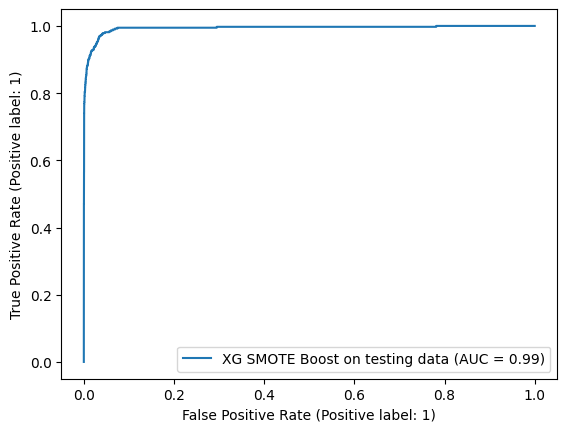

In [107]:
#plot_roc_curve(xgbSmoteModel, xTest, yTest, name = 'XG SMOTE Boost on testing data')
RocCurveDisplay.from_estimator(xgbSmoteModel, xTest, yTest, name = 'XG SMOTE Boost on testing data')

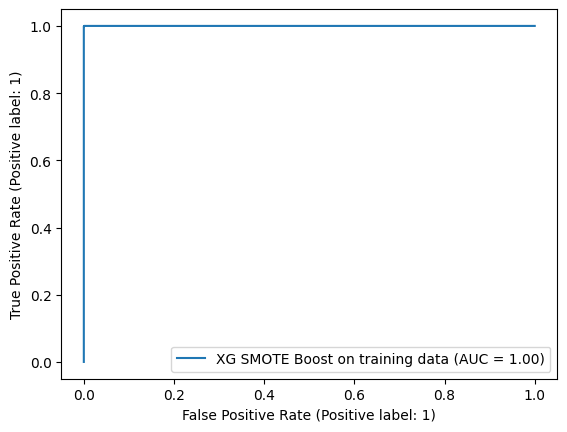

In [108]:
#plot_roc_curve(xgbSmoteModel, xTrain, yTrain, name = 'XG SMOTE Boost on training data')
RocCurveDisplay.from_estimator(xgbSmoteModel, xTrain, yTrain, name = 'XG SMOTE Boost on training data')

After using SMOTE our test error has increased sligthly from 0.006 to 0.008 but that is acceptable as we are adding more data to increase the number of positive class samples to handle the class imbalance. This classifier is a better predictor as it is getting trained on more balanced class data.